In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
def problem1(filename):
    # Read data from csv file
    data=pd.read_csv(filename)
    # Drop Date column from Data as It is said
    data=data.drop(['Date'],axis=1)
    # Split data to input and target
    # X is input(features) data
    X=data.drop(['Calories Burned'],axis=1)
    # y is target(output) data
    y=data['Calories Burned']
    # I remove comma seperator from data, because comma seperated values not convert to float
    for column_names in X.columns:
        X[column_names]=X[column_names].replace(',','',regex=True)
    # Same operation for target data
    y=y.replace(',','',regex=True)
    ##########################
    # For first task
    # SelectKBest function helps to find feature selection. You can select score function and top k number
    selector=SelectKBest(score_func=mutual_info_regression,k=4)
    # Selector must fit and transform data.
    selections=selector.fit_transform(X,y)
    # To identify selected features we use get_support method.
    filter=selector.get_support()
    # Get feature names from X
    features=np.array(X.columns)
    # Print column which are selected
    print("Selected features having top mutual information scores:")
    print(features[filter])
    ###########################
    # For second task
    # Create object which is Recursive Feature Elimination
    # RFE use Ridge regressor as estimator
    rfe=RFE(Ridge(),n_features_to_select=4)
    # Same operations like we did in task1
    rfe_selection=rfe.fit_transform(X,y)
    filter2=rfe.get_support()
    rfe_features=np.array(X.columns)
    print("Selected features by Recursive Feature Elimination:")
    print(rfe_features[filter2])

In [2]:
problem1('fitbit.csv')

Selected features having top mutual information scores:
['Steps' 'Distance' 'Minutes Fairly Active' 'Activity Calories']
Selected features by Recursive Feature Elimination:
['Distance' 'Minutes Lightly Active' 'Minutes Fairly Active'
 'Minutes Very Active']


In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
def problem2(filename):
    # Read data from csv file
    data=pd.read_csv(filename)
    # Drop ID column from Data as It is said
    data=data.drop(['ID'],axis=1)
    # Get features from data
    features=data.iloc[:,:4]
    # Scale data because, we want to work with data that are in same range
    scaler=StandardScaler()
    features=scaler.fit_transform(features)
    # Create lists to collect coefficents for two method
    elbow_coeff=[]
    silhouette_coeff=[]
    # Range 2 to 9 
    cluster_numbers=range(2,10)
    for cluster_number in cluster_numbers:
        # Create a model which n_cluster in range 2 to 9
        model=KMeans(n_clusters=cluster_number)
        model.fit(features)
        # Get coefficents each n_cluster and each method
        elbow_coeff.append(model.inertia_)
        silhouette_coeff.append(silhouette_score(features,model.labels_))
    # Plotting things 
    # What we understand when look data ?
    # Elbow method says that, cluster in data might be three or four
    # Because The biggest decrease occurred at this point.
    plt.plot(cluster_numbers,elbow_coeff,'bo-')
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.xlabel("Cluster Number")
    plt.title("Elbow Method")
    plt.show()
    # The silhouette method says number of cluster might be four. 
    # When score close to +1, that the instance is well inside its own cluster and far from other cluster
    plt.plot(cluster_numbers,silhouette_coeff,'bo-')
    plt.ylabel("silhouette_score")
    plt.grid(True)
    plt.xlabel("Cluster Number")
    plt.title("Silhouette Method")
    plt.show()


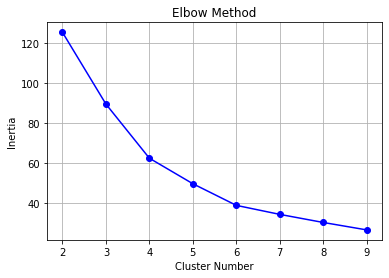

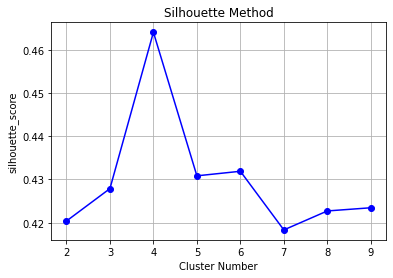

In [4]:
problem2('customer.csv')